In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pca_tools import pca_scores
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline

In [3]:
pbp = pd.read_csv('play_by_play.csv')
pbp['teamID'] = pbp.offensive_team.astype(str) + pbp.season.astype(str)

pbp = pbp[pbp.teamID != 'nan2010']


In [4]:
# Filter Data 
# Only Passing plays without sacks
play_filter = (pbp.pass_outcome == 'Complete')
filtered_data = pbp[play_filter & (pbp.accepted_penalty == 0)]

In [5]:
teams = filtered_data.groupby('teamID').count()
teams.index

Index([u'ARI2009', u'ARI2010', u'ARI2011', u'ARI2012', u'ARI2013', u'ARI2014',
       u'ARI2015', u'ARI2016', u'ATL2009', u'ATL2010',
       ...
       u'TEN2015', u'TEN2016', u'WAS2009', u'WAS2010', u'WAS2011', u'WAS2012',
       u'WAS2013', u'WAS2014', u'WAS2015', u'WAS2016'],
      dtype='object', name=u'teamID', length=256)

In [6]:
yd_bins = np.arange(-100, 101, 1)
distributions = np.zeros((teams.index.size, len(yd_bins) - 1))
for i, team in enumerate(teams.index[:-1]):
        
    single_team = filtered_data[(filtered_data.teamID == team)]
    # Yards ball was in air
    #print(team)
    #print(team)
    #print(single_team.air_yds)
    all_plays = plt.hist(single_team.air_yds.values, bins=yd_bins)
    total_plays = single_team.play_attempted.count()
    
    # Normalized histogram for each team
    distributions[i, :] = all_plays[0] / total_plays
    plt.close()

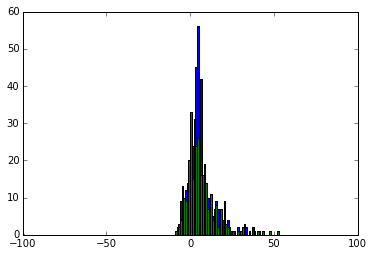

In [7]:
single_team = filtered_data[(filtered_data.teamID == 'NO2016')]
plt.hist(single_team.air_yds.values, bins=yd_bins)

single_team = filtered_data[(filtered_data.teamID == 'CLE2016')]
plt.hist(single_team.air_yds.values, bins=yd_bins)
plt.show()



In [8]:
pca = PCA()
pca.fit(distributions)
mean_distribution = np.mean(distributions, axis=0)
n_components = len(yd_bins) - 1

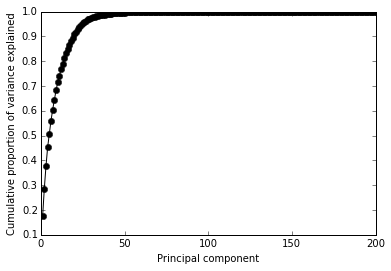

In [9]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, n_components + 1, 1)
plt.plot(x, cumulative_variance, 'ko-')

plt.xlabel('Principal component')
plt.ylabel('Cumulative proportion of variance explained')

plt.savefig('pca_variance.pdf')

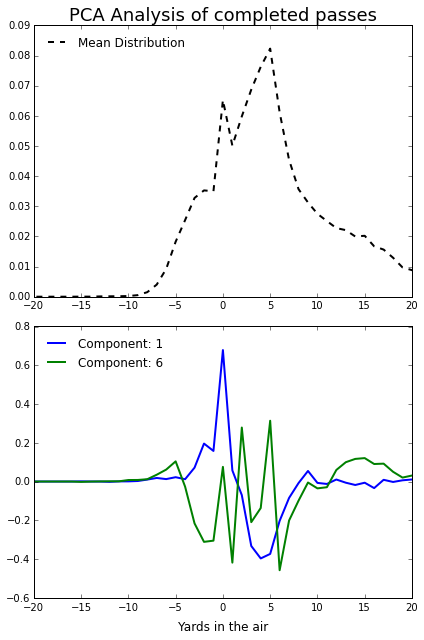

In [10]:
ns = [0, 5]

plt.figure(figsize=(6, 9))

plt.subplot(211)
plt.title('PCA Analysis of completed passes', fontsize=18)
plt.plot(yd_bins[:-1], mean_distribution, 'k--',linewidth=2, label='Mean Distribution')
plt.xlim([-20, 20])
plt.yticks(np.arange(0, .1, 0.01))
plt.legend(frameon=False, loc=2)
plt.subplot(212)
for n in ns:
    plt.plot(yd_bins[:-1], pca.components_[n], label='Component: {}'.format(n + 1), linewidth=2)
plt.xlim([-20, 20])
plt.legend(frameon=False,loc=2)
plt.xlabel('Yards in the air', fontsize=12, labelpad=8)
plt.tight_layout()

plt.savefig('pca_components.pdf')

In [11]:
from pca_tools import pca_scores

In [12]:
scores = pca_scores(distributions, pca.components_[0:20, :])

In [13]:
from scipy.stats import norm, linregress


In [14]:
team_stats = pd.read_csv('team_stats.csv', index_col=0)
team_stats.sort_index(inplace=True)


P value: 0.00996984154635


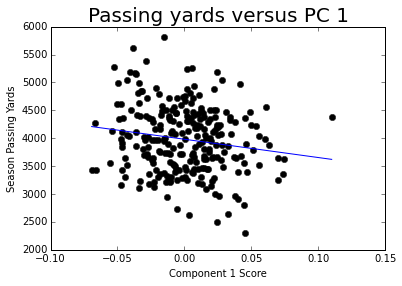

In [28]:
n = 0
plt.plot(scores[n, :], team_stats.passing_yds.values, 'ko')
m, b, r_value, p_value, std_err = linregress(scores[n, :], team_stats.passing_yds)
x0 = min(scores[n, :])
xf = max(scores[n, :])
x = np.linspace(x0, xf,  100)
y = m * x + b
plt.plot(x, y)
plt.xlabel('Component {} Score'.format(n+1))
plt.ylabel('Season Passing Yards')
plt.title('Passing yards versus PC 1',fontsize=20)
plt.savefig('component_{}_score_yds.pdf'.format(n))
print('P value: {}'.format(p_value))


P value: 0.00988043890949


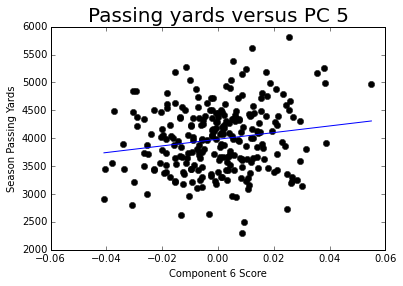

In [27]:
n = 5
plt.plot(scores[n, :], team_stats.passing_yds.values, 'ko')
m, b, r_value, p_value, std_err = linregress(scores[n, :], team_stats.passing_yds)
x0 = min(scores[n, :])
xf = max(scores[n, :])
x = np.linspace(x0, xf,  100)
y = m * x + b
plt.plot(x, y)
plt.xlabel('Component {} Score'.format(n+1))
plt.ylabel('Season Passing Yards')
plt.title('Passing yards versus PC 5',fontsize=20)
plt.savefig('component_{}_score_yds.pdf'.format(n))
print('P value: {}'.format(p_value))